In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def f(p,start=0,end=16,bins=100):
    def g(t):
        i = int((t-start)/(end-start)*bins)
        return p[i]
    return g

df = pd.read_csv('../df_all_.csv')
df = df[df['previous10']>=0]
g = f(p)
df['s'] = df['time'].map(g)

train = df[df['day']<80]
test = df[df['day']>=80]
train_X = train.drop(['day','in','out','passenger','passenger_pt'],axis=1)
train_Y = train.loc[:,'passenger']
test_X = test.drop(['day','in','out','passenger','passenger_pt'],axis=1)
test_Y = test.loc[:,'passenger']

mae=9.211376035442477
Index(['time', 'S0', 'S1', 'dtime', 'previous1', 'previous2', 'previous3',
       'previous4', 'previous5', 'previous6', 'previous7', 'previous8',
       'previous9', 'previous10', 's'],
      dtype='object')


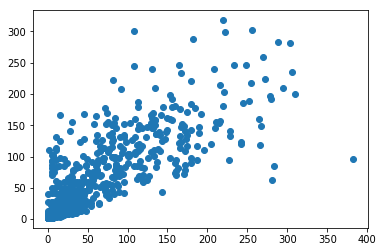

In [49]:
import lightgbm as lgb

lgb_train = lgb.Dataset(train_X, train_Y)
lgb_eval = lgb.Dataset(test_X, test_Y, reference=lgb_train)

params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}

lg = lgb.train(params,lgb_train)
predict = lg.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
print(train_X.columns)
#print(lg.feature_importances_)
plt.scatter(test_Y,predict)
plt.show()

In [42]:
train.head()

,day,time,in,out,passenger,S0,S1,passenger_pt,dtime,previous1,previous2,previous3,previous4,previous5,previous6,previous7,previous8,previous9,previous10,s
10,0.0,1.35,1.0,0.0,1.0,919.0,81.0,33.333333,0.03,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,3.207792
11,0.0,1.38,1.0,0.0,1.0,920.0,80.0,33.333333,0.03,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,3.207792
12,0.0,1.46,1.0,0.0,1.0,921.0,79.0,12.500000,0.08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,3.709677
13,0.0,1.49,1.0,0.0,2.0,858.0,142.0,66.666667,0.03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.709677
14,0.0,1.77,1.0,0.0,2.0,829.0,171.0,7.142857,0.28,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.685039


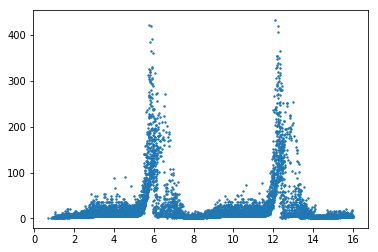

In [14]:
plt.scatter(train['time'],train['passenger'],s=2)
plt.show()

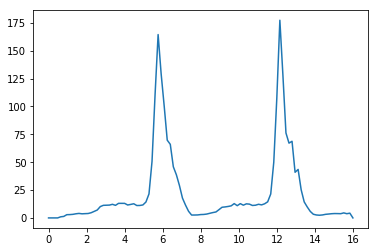

In [25]:
df = train
bins = 100
start = 0
end = 16
t = []
p = []
for i in np.linspace(start,end,bins+1):
    tmp = df[df['time']>i]
    tmp = tmp[tmp['time']<(i+(end-start)/bins)]
    if(len(tmp)==0):
        #print(i,0)
        t.append(i)
        p.append(0)
    else:
        #print(i,tmp.mean()['passenger'])
        t.append(i)
        p.append(tmp.mean()['passenger'])
plt.plot(t,p)
plt.show()